In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from matplotlib.pylab import rcParams
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [290]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4476-E7F9

 Directory of C:\Users\vishw\Project 97

12-03-2022  20:50    <DIR>          .
12-03-2022  13:30    <DIR>          ..
12-03-2022  20:14    <DIR>          .ipynb_checkpoints
12-03-2022  20:50            63,462 model & prediction.vishwas.ipynb
12-03-2022  03:49            13,125 Stock Data - AutoMotive - NSEpy (1).ipynb
12-03-2022  03:50            34,720 Stock_Data_AutoMotive_NSEpy.ipynb
12-03-2022  20:41           164,299 Tata_Motors_stock final.csv
12-03-2022  20:09           276,928 TATAMOTORS_EDA.ipynb
12-03-2022  20:13                72 Untitled.ipynb
12-03-2022  20:14                72 Untitled1.ipynb
12-03-2022  04:07            18,219 Web_srcaping_infosys_data.ipynb
               8 File(s)        570,897 bytes
               3 Dir(s)  249,220,280,320 bytes free


In [291]:
model=pd.read_csv("Tata_Motors_stock final.csv")
model.head()

,Date,Symbol,Series,Open,High,Low,Last,Close,Volume
0,2012-03-01,TATAMOTORS,EQ,269.9,273.9,265.40,266.05,267.20,10231237
1,2012-03-02,TATAMOTORS,EQ,269.5,272.0,264.65,267.00,267.65,10962544
2,2012-03-03,TATAMOTORS,EQ,266.4,268.7,266.00,267.75,267.95,488065
3,2012-03-05,TATAMOTORS,EQ,267.0,275.6,266.25,274.45,274.15,13724738
4,2012-03-06,TATAMOTORS,EQ,274.1,279.0,264.00,264.85,267.00,11559507


In [292]:
model.tail()

,Date,Symbol,Series,Open,High,Low,Last,Close,Volume
2475,2022-02-25,TATAMOTORS,EQ,444.85,465.70,441.60,460.85,459.75,48876182
2476,2022-02-28,TATAMOTORS,EQ,445.00,457.35,440.45,453.95,454.05,34475468
2477,2022-03-02,TATAMOTORS,EQ,452.95,454.25,444.55,448.80,447.60,25791134
2478,2022-03-03,TATAMOTORS,EQ,458.50,458.50,435.00,437.90,437.10,29599672
2479,2022-03-04,TATAMOTORS,EQ,431.85,431.85,414.75,418.40,417.25,38765185


In [293]:
model2=model.reset_index()['Close']

In [294]:
model2

0       267.20
1       267.65
2       267.95
3       274.15
4       267.00
         ...  
2475    459.75
2476    454.05
2477    447.60
2478    437.10
2479    417.25
Name: Close, Length: 2480, dtype: float64

In [295]:
model2.shape

(2480,)

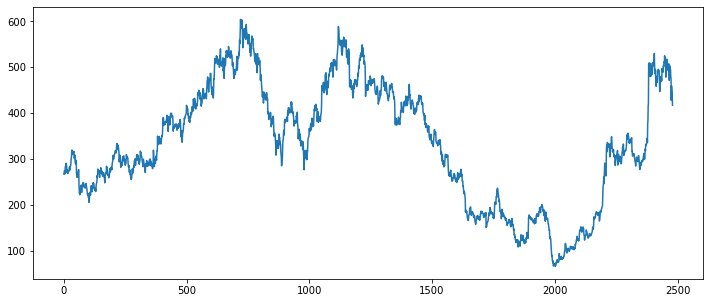

In [296]:
plt.rcParams['figure.figsize'] = (12,5)
plt.plot(model2)

In [297]:
scaler=MinMaxScaler(feature_range=(0,1))
model2=scaler.fit_transform(np.array(model2).reshape(-1,1))

In [298]:
model2

array([[0.3744089 ],
       [0.37524339],
       [0.37579972],
       ...,
       [0.70894761],
       [0.68947612],
       [0.65266574]])

In [299]:
model2.shape

(2480, 1)

# Splitting dataset into train and test

In [300]:
training_size=int(len(model2)*0.65)
test_size=len(model2)-training_size
train_data,test_data=model2[0:training_size,:],model2[training_size:len(model2),:1]

In [301]:
training_size,test_size

(1612, 868)

# Converting array of values 

In [302]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [303]:
# reshape into x=t,t+1,t+3 and y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [304]:
print(x_train.shape),print(y_train.shape)

(1511, 100)
(1511,)


(None, None)

In [305]:
print(x_test.shape), print(y_test.shape)

(767, 100)
(767,)


(None, None)

Before creating the lstm model,reshaping of x_train into 3 dimension has to be done by adding 1.

In [306]:
# reshape input to be (samples, time steps ,feature) which is required for LSTM.
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Creating Stacked LSTM model

In [307]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [308]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [309]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Fitting the x_train,y_train

In [310]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 19s 342ms/step - loss: 0.0530 - val_loss: 0.0235
Epoch 2/100
24/24 [==============================] - 6s 246ms/step - loss: 0.0057 - val_loss: 0.0083
Epoch 3/100
24/24 [==============================] - 5s 225ms/step - loss: 0.0028 - val_loss: 0.0045
Epoch 4/100
24/24 [==============================] - 5s 228ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 5/100
24/24 [==============================] - 5s 225ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 6/100
24/24 [==============================] - 6s 246ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/100
24/24 [==============================] - 5s 204ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 8/100
24/24 [==============================] - 5s 228ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 9/100
24/24 [==============================] - 5s 205ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 10/100
24/24 [==============================] - 5s 199ms/step - loss: 0.0017 - val_l

24/24 [==============================] - 4s 150ms/step - loss: 4.7549e-04 - val_loss: 6.0397e-04
Epoch 79/100
24/24 [==============================] - 4s 150ms/step - loss: 5.3653e-04 - val_loss: 6.2630e-04
Epoch 80/100
24/24 [==============================] - 4s 150ms/step - loss: 6.4633e-04 - val_loss: 6.7471e-04
Epoch 81/100
24/24 [==============================] - 4s 150ms/step - loss: 4.8708e-04 - val_loss: 5.9210e-04
Epoch 82/100
24/24 [==============================] - 4s 153ms/step - loss: 4.5613e-04 - val_loss: 5.6382e-04
Epoch 83/100
24/24 [==============================] - 4s 152ms/step - loss: 4.5389e-04 - val_loss: 6.5706e-04
Epoch 84/100
24/24 [==============================] - 4s 153ms/step - loss: 4.6344e-04 - val_loss: 5.5414e-04
Epoch 85/100
24/24 [==============================] - 4s 152ms/step - loss: 4.0913e-04 - val_loss: 5.1797e-04
Epoch 86/100
24/24 [==============================] - 4s 164ms/step - loss: 4.6236e-04 - val_loss: 5.4953e-04
Epoch 87/100
24/24 [===

# Prediction of 30 days and plotting the output

In [311]:
import tensorflow as tf

In [312]:
tf.__version__

'2.7.0'

In [313]:
#Prediction and checking the performance metrics.
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [314]:
#transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [315]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

398.712550865782

In [316]:
#Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

255.8602902357181

# Plotting

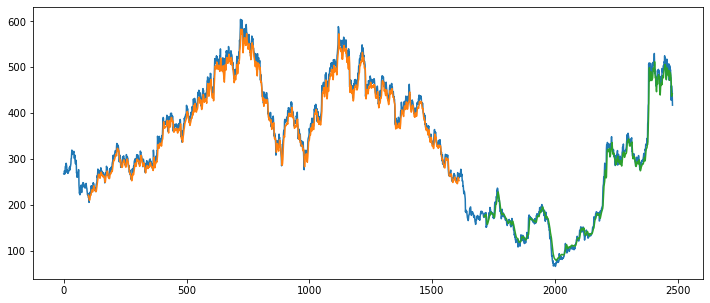

In [317]:
#shift predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(model2)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictPlot=numpy.empty_like(model2)
testPredictPlot[:,:]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(model2)-1,:] = test_predict
#plotting baseline and predictions
plt.plot(scaler.inverse_transform(model2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [318]:
len(test_data)

868

In [319]:
x_input=test_data[768:].reshape(1,-1)
x_input.shape

(1, 100)

In [320]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [321]:
temp_input

[0.6498840982846545,
 0.6593416782568382,
 0.818915159944367,
 0.8016689847009736,
 0.8239221140472879,
 0.7725544738062122,
 0.7818266110338432,
 0.8209550301344459,
 0.789244320815948,
 0.7688456189151598,
 0.8221604079740379,
 0.8022253129346313,
 0.770978210477515,
 0.7758924432081594,
 0.7796012980992117,
 0.7835883171070932,
 0.7781177561427908,
 0.7870190078813165,
 0.808715808993973,
 0.8240148354195641,
 0.826054705609643,
 0.8125173852573017,
 0.819193324061196,
 0.8162262401483541,
 0.8414464534075102,
 0.8620305980528511,
 0.8241075567918404,
 0.7803430690774223,
 0.7977746870653685,
 0.7850718590635141,
 0.7926750115901715,
 0.7323133982382939,
 0.7346314325452016,
 0.7293463143254519,
 0.7602225312934631,
 0.7673620769587389,
 0.7692165044042651,
 0.7452943903569772,
 0.7723690310616597,
 0.7948076031525265,
 0.7949003245248029,
 0.795827538247566,
 0.7974965229485396,
 0.7864626796476587,
 0.7906351414000926,
 0.7911914696337505,
 0.7508576726935557,
 0.7079276773296245,

In [322]:
#demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        print(len(temp_input))
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        

[0.65334874]
101
101
101
1 day input [0.65934168 0.81891516 0.80166898 0.82392211 0.77255447 0.78182661
 0.82095503 0.78924432 0.76884562 0.82216041 0.80222531 0.77097821
 0.77589244 0.7796013  0.78358832 0.77811776 0.78701901 0.80871581
 0.82401484 0.82605471 0.81251739 0.81919332 0.81622624 0.84144645
 0.8620306  0.82410756 0.78034307 0.79777469 0.78507186 0.79267501
 0.7323134  0.73463143 0.72934631 0.76022253 0.76736208 0.7692165
 0.74529439 0.77236903 0.7948076  0.79490032 0.79582754 0.79749652
 0.78646268 0.79063514 0.79119147 0.75085767 0.70792768 0.72007418
 0.751414   0.75484469 0.74603616 0.75261938 0.76940195 0.76161335
 0.75122856 0.77348169 0.80166898 0.78683357 0.78711173 0.78544274
 0.78868799 0.81298099 0.80853037 0.81956421 0.82828002 0.82447844
 0.8524803  0.82614743 0.84478442 0.83523412 0.8095503  0.7661567
 0.78859527 0.79573482 0.80111266 0.8390357  0.81409365 0.81798795
 0.81446453 0.80723227 0.7961057  0.79267501 0.80843764 0.8199351
 0.80398702 0.75317571 0.813

8 day output [[0.5683619]]
9 day input [0.76884562 0.82216041 0.80222531 0.77097821 0.77589244 0.7796013
 0.78358832 0.77811776 0.78701901 0.80871581 0.82401484 0.82605471
 0.81251739 0.81919332 0.81622624 0.84144645 0.8620306  0.82410756
 0.78034307 0.79777469 0.78507186 0.79267501 0.7323134  0.73463143
 0.72934631 0.76022253 0.76736208 0.7692165  0.74529439 0.77236903
 0.7948076  0.79490032 0.79582754 0.79749652 0.78646268 0.79063514
 0.79119147 0.75085767 0.70792768 0.72007418 0.751414   0.75484469
 0.74603616 0.75261938 0.76940195 0.76161335 0.75122856 0.77348169
 0.80166898 0.78683357 0.78711173 0.78544274 0.78868799 0.81298099
 0.80853037 0.81956421 0.82828002 0.82447844 0.8524803  0.82614743
 0.84478442 0.83523412 0.8095503  0.7661567  0.78859527 0.79573482
 0.80111266 0.8390357  0.81409365 0.81798795 0.81446453 0.80723227
 0.7961057  0.79267501 0.80843764 0.8199351  0.80398702 0.75317571
 0.81353732 0.80324525 0.80602689 0.79341678 0.79582754 0.76578581
 0.76346778 0.67250811 0

18 day output [[0.49060026]]
19 day input [0.82401484 0.82605471 0.81251739 0.81919332 0.81622624 0.84144645
 0.8620306  0.82410756 0.78034307 0.79777469 0.78507186 0.79267501
 0.7323134  0.73463143 0.72934631 0.76022253 0.76736208 0.7692165
 0.74529439 0.77236903 0.7948076  0.79490032 0.79582754 0.79749652
 0.78646268 0.79063514 0.79119147 0.75085767 0.70792768 0.72007418
 0.751414   0.75484469 0.74603616 0.75261938 0.76940195 0.76161335
 0.75122856 0.77348169 0.80166898 0.78683357 0.78711173 0.78544274
 0.78868799 0.81298099 0.80853037 0.81956421 0.82828002 0.82447844
 0.8524803  0.82614743 0.84478442 0.83523412 0.8095503  0.7661567
 0.78859527 0.79573482 0.80111266 0.8390357  0.81409365 0.81798795
 0.81446453 0.80723227 0.7961057  0.79267501 0.80843764 0.8199351
 0.80398702 0.75317571 0.81353732 0.80324525 0.80602689 0.79341678
 0.79582754 0.76578581 0.76346778 0.67250811 0.73147891 0.72090867
 0.70894761 0.68947612 0.65266574 0.65334874 0.63600498 0.62402505
 0.61394542 0.60449868 

28 day output [[0.42946774]]
29 day input [0.78507186 0.79267501 0.7323134  0.73463143 0.72934631 0.76022253
 0.76736208 0.7692165  0.74529439 0.77236903 0.7948076  0.79490032
 0.79582754 0.79749652 0.78646268 0.79063514 0.79119147 0.75085767
 0.70792768 0.72007418 0.751414   0.75484469 0.74603616 0.75261938
 0.76940195 0.76161335 0.75122856 0.77348169 0.80166898 0.78683357
 0.78711173 0.78544274 0.78868799 0.81298099 0.80853037 0.81956421
 0.82828002 0.82447844 0.8524803  0.82614743 0.84478442 0.83523412
 0.8095503  0.7661567  0.78859527 0.79573482 0.80111266 0.8390357
 0.81409365 0.81798795 0.81446453 0.80723227 0.7961057  0.79267501
 0.80843764 0.8199351  0.80398702 0.75317571 0.81353732 0.80324525
 0.80602689 0.79341678 0.79582754 0.76578581 0.76346778 0.67250811
 0.73147891 0.72090867 0.70894761 0.68947612 0.65266574 0.65334874
 0.63600498 0.62402505 0.61394542 0.60449868 0.59527171 0.58616489
 0.57718414 0.56836188 0.55972475 0.55128658 0.54305083 0.5350129
 0.52716631 0.51950377

In [323]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [324]:
len(model2)

2480

In [325]:
model3=model2.tolist()
model3.extend(lst_output)

ValueError: x and y must have same first dimension, but have shapes (30,) and (31, 1)

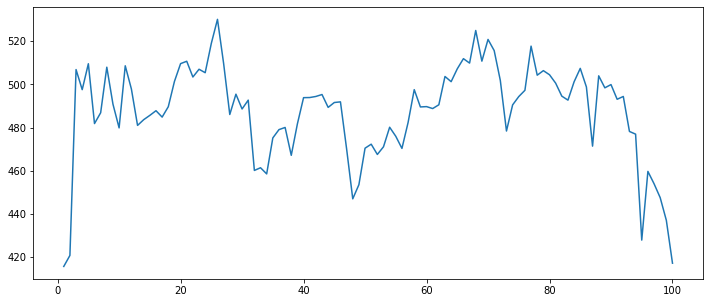

In [326]:
plt.plot(day_new,scaler.inverse_transform(model2[2380:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

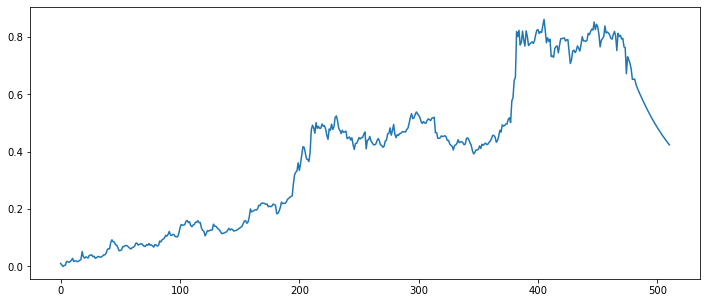

In [327]:
model3=model2.tolist()
model3.extend(lst_output)
plt.plot(model3[2000:])